In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary
import torchvision.transforms as T

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [3]:
train_set =torchvision.datasets.MNIST(root='dataset/MNIST', train= True,download=True, transform=T.Compose([T.ToTensor(), T.Lambda(lambda x: torch.flatten(x))]))
test_set =torchvision.datasets.MNIST(root='dataset/MNIST',train=False, download=True, transform=T.Compose([T.ToTensor(), T.Lambda(lambda x: torch.flatten(x))]))

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting dataset/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting dataset/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting dataset/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting dataset/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
class AE(nn.Module):
    def __init__(self,hiddenNueron):
        super(AE,self).__init__()
        self.encode1 = nn.Linear(in_features=28*28,out_features=256) # encoding 28*28 to 256
        self.encode2 = nn.Linear(in_features=256,out_features=hiddenNueron)

        self.decode1 = nn.Linear(in_features=hiddenNueron,out_features=256)
        self.decode2 = nn.Linear(in_features=256,out_features=28*28)
    
    def forward(self,x):
        x = F.relu(self.encode1(x))
        x = F.relu(self.encode2(x))

        x = F.relu(self.decode1(x))
        x = F.relu(self.decode2(x))
      
        return x

# 1 Adam Optimizer

In [5]:
train_loader_adam = torch.utils.data.DataLoader(train_set,batch_size=30)
test_loader_adam = torch.utils.data.DataLoader(test_set,batch_size=1)

In [6]:
# hidden size will be 8 , 32 , 128
adam_8 = AE(8)
adam_8.to(device)

optimizer_8 = optim.Adam(adam_8.parameters(),lr=0.001)

adam_8_loss = []
criterion = nn.MSELoss()
for epoch in range(30):
    total_loss = 0.0
    for batch in train_loader_adam:
        images, labels = batch[0].to(device),batch[1].to(device)
        #print(images.shape)
        preds = adam_8(images)
        #print(preds.shape)
        loss = criterion(preds,images)
        
        optimizer_8.zero_grad()
        loss.backward()
        optimizer_8.step()
        
        total_loss += loss.item()
    adam_8_loss.append(total_loss)
    print("epoch: ",epoch,"loss: ",total_loss)
print("Average loss for each image : ", total_loss/len(train_set))

epoch:  0 loss:  78.60753484256566
epoch:  1 loss:  65.70011226087809
epoch:  2 loss:  62.65082612261176
epoch:  3 loss:  61.406584253534675
epoch:  4 loss:  59.57210308127105
epoch:  5 loss:  57.23131435550749
epoch:  6 loss:  56.54956056922674
epoch:  7 loss:  56.13119751960039
epoch:  8 loss:  55.79992653429508
epoch:  9 loss:  55.47827195562422
epoch:  10 loss:  55.206434678286314
epoch:  11 loss:  54.98052232339978
epoch:  12 loss:  54.78867737390101
epoch:  13 loss:  54.610698675736785
epoch:  14 loss:  53.65386654809117
epoch:  15 loss:  53.44749424792826
epoch:  16 loss:  53.32302170805633
epoch:  17 loss:  53.18420673161745
epoch:  18 loss:  53.07374634034932
epoch:  19 loss:  52.96073619276285
epoch:  20 loss:  52.86221871525049
epoch:  21 loss:  52.75540738925338
epoch:  22 loss:  52.665635753422976
epoch:  23 loss:  52.5911450535059
epoch:  24 loss:  52.52715984545648
epoch:  25 loss:  52.44003730639815
epoch:  26 loss:  52.365907521918416
epoch:  27 loss:  52.3110812623053

In [ ]:
test_loss_adam_8 = 0
for data in test_loader_adam:
    images, labels = data[0].to(device),data[1].to(device)
    outputs = adam_8(images)
    loss = ((outputs-images)**2).sum()
    #loss = criterion(outputs,images)
    test_loss_adam_8 += (loss.item())
print("total reconstruction loss using adam and 8 neurons : ", test_loss_adam_8)
print("average loss ", test_loss_adam_8/len(test_set))

total reconstruction loss using adam and 8 neurons :  221448.48379075527
average loss  22.144848379075526


In [ ]:
adam_32 = AE(32)
adam_32.to(device)

optimizer_32 = optim.Adam(adam_32.parameters(),lr=0.001)

adam_32_loss = []
criterion = nn.MSELoss()
for epoch in range(30):
    total_loss = 0.0
    for batch in train_loader_adam:
        images, labels = batch[0].to(device),batch[1].to(device)
        #print(images.shape)
        preds = adam_32(images)
        #print(preds.shape)
        loss = criterion(preds,images)
        
        optimizer_32.zero_grad()
        loss.backward()
        optimizer_32.step()
        
        total_loss += loss.item()
    adam_32_loss.append(total_loss)
    print("epoch: ",epoch,"loss: ",total_loss)
print("Average loss for each image : ", total_loss/len(train_set))

epoch:  0 loss:  57.880416974425316
epoch:  1 loss:  43.768534106202424
epoch:  2 loss:  41.37661052495241
epoch:  3 loss:  39.41476013511419
epoch:  4 loss:  37.75034869462252
epoch:  5 loss:  37.16123252734542
epoch:  6 loss:  35.949148000217974
epoch:  7 loss:  35.656093024648726
epoch:  8 loss:  35.424561717547476
epoch:  9 loss:  35.23726109135896
epoch:  10 loss:  35.07376249600202
epoch:  11 loss:  34.93449201155454
epoch:  12 loss:  34.814077037386596
epoch:  13 loss:  34.665901247411966
epoch:  14 loss:  34.48947172611952
epoch:  15 loss:  34.39575836248696
epoch:  16 loss:  34.30061641987413
epoch:  17 loss:  34.226248691789806
epoch:  18 loss:  34.163718124851584
epoch:  19 loss:  34.10666599776596
epoch:  20 loss:  34.04755966179073
epoch:  21 loss:  33.99329937901348
epoch:  22 loss:  33.94722272083163
epoch:  23 loss:  33.90284259803593
epoch:  24 loss:  33.86188740096986
epoch:  25 loss:  33.82030129991472
epoch:  26 loss:  33.787894438020885
epoch:  27 loss:  33.7494848

In [ ]:
test_loss_adam_32 = 0
for data in test_loader_adam:
    images, labels = data[0].to(device),data[1].to(device)
    outputs = adam_32(images)
    loss = ((outputs-images)**2).sum()
    #loss = criterion(outputs,images)
    test_loss_adam_32 += loss.item()*images.shape[0]
print("total reconstruction loss using adam and 32 neurons : ", test_loss_adam_32)
print("average loss ", test_loss_adam_32/len(test_set))

total reconstruction loss using adam and 32 neurons :  141135.6001933813
average loss  14.11356001933813


In [ ]:
adam_128 = AE(128)
adam_128.to(device)

optimizer_128 = optim.Adam(adam_128.parameters(),lr=0.001)

adam_128_loss = []
criterion = nn.MSELoss()
for epoch in range(30):
    total_loss = 0.0
    for batch in train_loader_adam:
        images, labels = batch[0].to(device),batch[1].to(device)
        #print(images.shape)
        preds = adam_128(images)
        #print(preds.shape)
        loss = criterion(preds,images)
        
        optimizer_128.zero_grad()
        loss.backward()
        optimizer_128.step()
        
        total_loss += loss.item()
    adam_128_loss.append(total_loss)
    print("epoch: ",epoch,"loss: ",total_loss)
print("Average loss for each image : ", total_loss/len(train_set))

epoch:  0 loss:  50.42731032706797
epoch:  1 loss:  36.63838168233633
epoch:  2 loss:  34.71149178221822
epoch:  3 loss:  33.69960338342935
epoch:  4 loss:  33.15388708375394
epoch:  5 loss:  32.83688974287361
epoch:  6 loss:  32.626047641038895
epoch:  7 loss:  32.472586332820356
epoch:  8 loss:  32.3254375141114
epoch:  9 loss:  32.195262985304
epoch:  10 loss:  32.08465356938541
epoch:  11 loss:  31.980727635324
epoch:  12 loss:  31.91103759314865
epoch:  13 loss:  31.81346814148128
epoch:  14 loss:  31.726466664113104
epoch:  15 loss:  31.64861200656742
epoch:  16 loss:  31.5835771439597
epoch:  17 loss:  31.500823007896543
epoch:  18 loss:  31.36902681272477
epoch:  19 loss:  31.28885142877698
epoch:  20 loss:  31.19167457241565
epoch:  21 loss:  31.136900942772627
epoch:  22 loss:  31.079134333878756
epoch:  23 loss:  31.00053529907018
epoch:  24 loss:  30.966205253265798
epoch:  25 loss:  30.90764084365219
epoch:  26 loss:  30.870216586627066
epoch:  27 loss:  30.817529963329434

In [ ]:
test_loss_adam_128 = 0
for data in test_loader_adam:
    images, labels = data[0].to(device),data[1].to(device)
    outputs = adam_128(images)
    #loss = criterion(outputs,images)
    loss = ((outputs-images)**2).sum()
    test_loss_adam_128 += loss.item()*images.shape[0]
print("total reconstruction loss using adam and 128 neurons : ", test_loss_adam_128)
print("average loss ", test_loss_adam_128/len(test_set))

total reconstruction loss using adam and 128 neurons :  126779.20681554079
average loss  12.67792068155408


Text(0, 0.5, 'Avg MSE ')

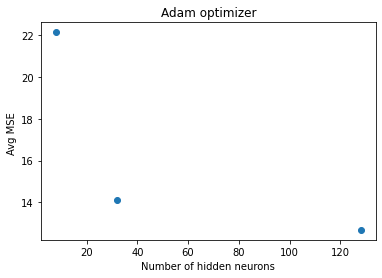

In [ ]:
plt.scatter([8,32,128],[test_loss_adam_8/len(test_set),test_loss_adam_32/len(test_set),test_loss_adam_128/len(test_set)])
plt.title("Adam optimizer")
plt.xlabel("Number of hidden neurons")
plt.ylabel("Avg MSE ")

### plot few reconstructed images of adam

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


labels: [0]


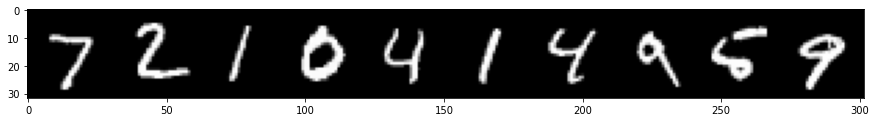

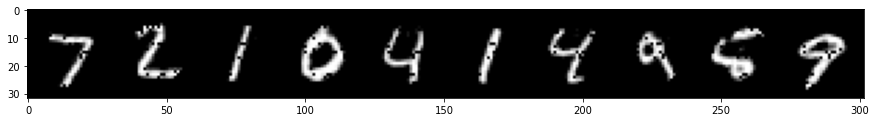

In [ ]:
images,labels = next(iter(test_loader_adam))
images = images[0:10]
labels = [0]
grid = torchvision.utils.make_grid(images.reshape(10,1,28,28), nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)))

images = images.to(device)
outputs = adam_128(images)
outputs = outputs.to('cpu')

grid_output = torchvision.utils.make_grid(outputs.reshape(10,1,28,28), nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid_output,(1,2,0)))

print('labels:',labels)

# 2 RMSProp

In [ ]:
train_loader_rms = torch.utils.data.DataLoader(train_set,batch_size=30)
test_loader_rms = torch.utils.data.DataLoader(test_set,batch_size=1)

In [ ]:
# hidden size will be 8 , 32 , 128
rms_8 = AE(8)
rms_8.to(device)

optimizer_8 = optim.RMSprop(rms_8.parameters(), lr=0.001)

rms_8_loss = []
criterion = nn.MSELoss()
for epoch in range(30):
    total_loss = 0.0
    for batch in train_loader_rms:
        images, labels = batch[0].to(device),batch[1].to(device)
        #print(images.shape)
        preds = rms_8(images)
        #print(preds.shape)
        loss = criterion(preds,images)
        
        optimizer_8.zero_grad()
        loss.backward()
        optimizer_8.step()
        
        total_loss += loss.item()
    rms_8_loss.append(total_loss)
    print("epoch: ",epoch,"loss: ",total_loss)
print("Average loss for each image : ", total_loss/len(train_set))

epoch:  0 loss:  98.97861056402326
epoch:  1 loss:  79.85144584998488
epoch:  2 loss:  74.29806890897453
epoch:  3 loss:  68.47978068329394
epoch:  4 loss:  65.61021810211241
epoch:  5 loss:  64.09288437850773
epoch:  6 loss:  63.00812012515962
epoch:  7 loss:  62.14971813745797
epoch:  8 loss:  61.449261935427785
epoch:  9 loss:  61.05765891820192
epoch:  10 loss:  60.7315758485347
epoch:  11 loss:  59.98747601546347
epoch:  12 loss:  58.59406063891947
epoch:  13 loss:  57.83276551216841
epoch:  14 loss:  56.72465164773166
epoch:  15 loss:  56.25126931257546
epoch:  16 loss:  55.643848814070225
epoch:  17 loss:  55.32024993933737
epoch:  18 loss:  55.00151577591896
epoch:  19 loss:  54.79859402962029
epoch:  20 loss:  54.63204579986632
epoch:  21 loss:  54.4690564032644
epoch:  22 loss:  54.33488933555782
epoch:  23 loss:  54.133113553747535
epoch:  24 loss:  53.993899738416076
epoch:  25 loss:  53.8871011454612
epoch:  26 loss:  53.7894206866622
epoch:  27 loss:  53.71371532604098
ep

In [ ]:
test_loss_rms_8 = 0
for data in test_loader_rms:
    images, labels = data[0].to(device),data[1].to(device)
    outputs = rms_8(images)
    loss = ((outputs-images)**2).sum()
    #loss = criterion(outputs,images)
    test_loss_rms_8 += loss.item()*images.shape[0]
print("total reconstruction loss using RMSProp and 8 neurons : ", test_loss_rms_8)
print("average loss ", test_loss_rms_8/len(test_set))

total reconstruction loss using RMSProp and 8 neurons :  218695.4240834713
average loss  21.86954240834713


In [ ]:
rms_32 = AE(32)
rms_32.to(device)

optimizer_32 = optim.RMSprop(rms_32.parameters(), lr=0.001)

rms_32_loss = []
criterion = nn.MSELoss()
for epoch in range(30):
    total_loss = 0.0
    for batch in train_loader_rms:
        images, labels = batch[0].to(device),batch[1].to(device)
        #print(images.shape)
        preds = rms_32(images)
        #print(preds.shape)
        loss = criterion(preds,images)
        
        optimizer_32.zero_grad()
        loss.backward()
        optimizer_32.step()
        
        total_loss += loss.item()
    rms_32_loss.append(total_loss)
    print("epoch: ",epoch,"loss: ",total_loss)
print("Average loss for each image : ", total_loss/len(train_set))

epoch:  0 loss:  65.3197382837534
epoch:  1 loss:  45.816262061707675
epoch:  2 loss:  41.201605967245996
epoch:  3 loss:  39.689677365124226
epoch:  4 loss:  38.402964632958174
epoch:  5 loss:  36.983089200221
epoch:  6 loss:  36.037843939848244
epoch:  7 loss:  34.88794922363013
epoch:  8 loss:  33.82630089391023
epoch:  9 loss:  33.16253725718707
epoch:  10 loss:  32.58891011308879
epoch:  11 loss:  32.1165161812678
epoch:  12 loss:  31.75668359734118
epoch:  13 loss:  31.503747446462512
epoch:  14 loss:  31.302310191094875
epoch:  15 loss:  31.161744718439877
epoch:  16 loss:  31.008347779512405
epoch:  17 loss:  30.86531018279493
epoch:  18 loss:  30.763107942417264
epoch:  19 loss:  30.660372076556087
epoch:  20 loss:  30.49744138866663
epoch:  21 loss:  29.258646667934954
epoch:  22 loss:  28.630972222425044
epoch:  23 loss:  28.461908317171037
epoch:  24 loss:  28.32315069064498
epoch:  25 loss:  28.203437683172524
epoch:  26 loss:  28.110469684936106
epoch:  27 loss:  28.02910

In [ ]:
test_loss_rms_32 = 0
for data in test_loader_rms:
    images, labels = data[0].to(device),data[1].to(device)
    outputs = rms_32(images)
    loss = ((outputs-images)**2).sum()
    #loss = criterion(outputs,images)
    test_loss_rms_32 += loss.item()*images.shape[0]
print("total reconstruction loss using RMSProp and 32 neurons : ", test_loss_rms_32)
print("average loss ", test_loss_rms_32/len(test_set))

total reconstruction loss using RMSProp and 32 neurons :  108473.15914863348
average loss  10.847315914863348


In [ ]:
rms_128 = AE(128)
rms_128.to(device)

optimizer_128 = optim.RMSprop(rms_128.parameters(), lr=0.001)

rms_128_loss = []
criterion = nn.MSELoss()
for epoch in range(30):
    total_loss = 0.0
    for batch in train_loader_rms:
        images, labels = batch[0].to(device),batch[1].to(device)
        #print(images.shape)
        preds = rms_128(images)
        #print(preds.shape)
        loss = criterion(preds,images)
        
        optimizer_128.zero_grad()
        loss.backward()
        optimizer_128.step()
        
        total_loss += loss.item()
    rms_128_loss.append(total_loss)
    print("epoch: ",epoch,"loss: ",total_loss)
print("Average loss for each image : ", total_loss/len(train_set))

epoch:  0 loss:  55.053910235874355
epoch:  1 loss:  36.38364825677127
epoch:  2 loss:  32.73473520576954
epoch:  3 loss:  30.51058075018227
epoch:  4 loss:  29.445023430511355
epoch:  5 loss:  28.61896280758083
epoch:  6 loss:  27.95720075070858
epoch:  7 loss:  27.43512862920761
epoch:  8 loss:  26.730283685028553
epoch:  9 loss:  26.216637381352484
epoch:  10 loss:  24.537234839983284
epoch:  11 loss:  23.712699219584465
epoch:  12 loss:  23.429423414636403
epoch:  13 loss:  23.141192322131246
epoch:  14 loss:  22.895411274861544
epoch:  15 loss:  22.67315013287589
epoch:  16 loss:  22.493155556265265
epoch:  17 loss:  22.31163749843836
epoch:  18 loss:  22.174506069160998
epoch:  19 loss:  22.036648138426244
epoch:  20 loss:  21.94172699516639
epoch:  21 loss:  21.837900636252016
epoch:  22 loss:  21.731655448675156
epoch:  23 loss:  21.655675283633173
epoch:  24 loss:  21.577952787280083
epoch:  25 loss:  21.52412937907502
epoch:  26 loss:  21.44195823604241
epoch:  27 loss:  21.3

In [ ]:
test_loss_rms_128 = 0
for data in test_loader_rms:
    images, labels = data[0].to(device),data[1].to(device)
    outputs = rms_128(images)
    #loss = criterion(outputs,images)
    loss = ((outputs-images)**2).sum()
    test_loss_rms_128 += loss.item()*images.shape[0]
print("total reconstruction loss using RMSProp and 128 neurons : ", test_loss_rms_128)
print("average loss ", test_loss_rms_128/len(test_set))

total reconstruction loss using RMSProp and 128 neurons :  86432.51908928156
average loss  8.643251908928155


Text(0, 0.5, 'Sum of MSE loss on all test data')

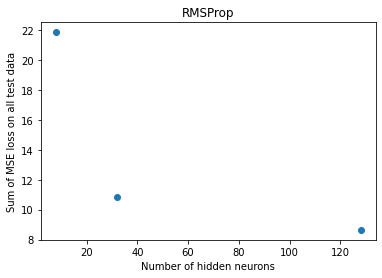

In [ ]:
plt.scatter([8,32,128],[test_loss_rms_8/len(test_set),test_loss_rms_32/len(test_set),test_loss_rms_128/len(test_set)])
plt.title("RMSProp")
plt.xlabel("Number of hidden neurons")
plt.ylabel("Sum of MSE loss on all test data")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


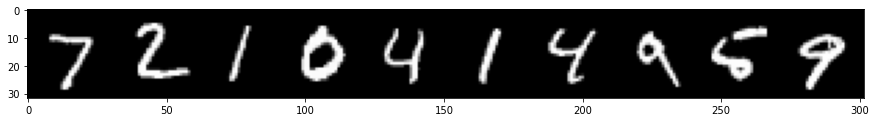

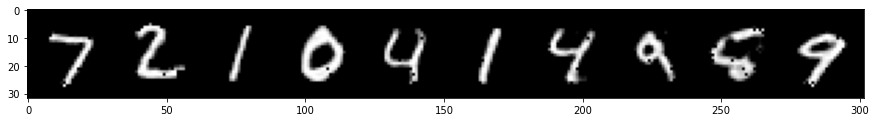

In [ ]:
images,labels = next(iter(test_loader_rms))
images = images[0:10]
labels = [0]
grid = torchvision.utils.make_grid(images.reshape(10,1,28,28), nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)))

images = images.to(device)
outputs = rms_128(images)
outputs = outputs.to('cpu')

grid_output = torchvision.utils.make_grid(outputs.reshape(10,1,28,28), nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid_output,(1,2,0)))

# 3 SGD with momentum

In [ ]:
train_loader_sgd_mom = torch.utils.data.DataLoader(train_set,batch_size=100)
test_loader_sgd_mom = torch.utils.data.DataLoader(test_set,batch_size=1)

In [ ]:
# hidden size will be 8 , 32 , 128
sgd_mom_8 = AE(8)
sgd_mom_8.to(device)

optimizer_8 = optim.SGD(sgd_mom_8.parameters(), lr=0.01, momentum=0.9)

sgd_mom_8_loss = []
criterion = nn.MSELoss()
for epoch in range(30):
    total_loss = 0.0
    for batch in train_loader_sgd_mom:
        images, labels = batch[0].to(device),batch[1].to(device)
        #print(images.shape)
        preds = sgd_mom_8(images)
        #print(preds.shape)
        loss = criterion(preds,images)
        
        optimizer_8.zero_grad()
        loss.backward()
        optimizer_8.step()
        
        total_loss += loss.item()
    sgd_mom_8_loss.append(total_loss)
    print("epoch: ",epoch,"loss: ",total_loss)
print("Average loss for each image : ", total_loss/len(train_set))

epoch:  0 loss:  56.846047334373
epoch:  1 loss:  49.3935838714242
epoch:  2 loss:  48.43526580184698
epoch:  3 loss:  47.889263954013586
epoch:  4 loss:  47.12593552470207
epoch:  5 loss:  46.30682601034641
epoch:  6 loss:  44.72178288549185
epoch:  7 loss:  43.320319436490536
epoch:  8 loss:  41.79546408355236
epoch:  9 loss:  39.99434042349458
epoch:  10 loss:  38.522341299802065
epoch:  11 loss:  37.34003126621246
epoch:  12 loss:  36.4755302965641
epoch:  13 loss:  35.46739298850298
epoch:  14 loss:  34.41028103232384
epoch:  15 loss:  33.559485483914614
epoch:  16 loss:  32.74185900390148
epoch:  17 loss:  32.265717666596174
epoch:  18 loss:  31.88883428275585
epoch:  19 loss:  31.54987244307995
epoch:  20 loss:  31.189618535339832
epoch:  21 loss:  30.917268734425306
epoch:  22 loss:  30.69233626499772
epoch:  23 loss:  30.511022705584764
epoch:  24 loss:  30.329077418893576
epoch:  25 loss:  30.144390039145947
epoch:  26 loss:  29.90082323178649
epoch:  27 loss:  29.67018411681

In [ ]:
test_loss_sgd_mom_8 = 0
for data in test_loader_sgd_mom:
    images, labels = data[0].to(device),data[1].to(device)
    outputs = sgd_mom_8(images)
    loss = ((outputs-images)**2).sum()
    #loss = criterion(outputs,images)
    test_loss_sgd_mom_8 += loss.item()*images.shape[0]
print("total reconstruction loss using SGD with momentum and 8 neurons : ", test_loss_sgd_mom_8)
print("average loss ", test_loss_sgd_mom_8/len(test_set))

total reconstruction loss using SGD with momentum and 8 neurons :  383853.0274963379
average loss  38.38530274963379


In [ ]:
sgd_mom_32 = AE(32)
sgd_mom_32.to(device)

optimizer_32 = optim.SGD(sgd_mom_32.parameters(), lr=0.01, momentum=0.9)

sgd_mom_32_loss = []
criterion = nn.MSELoss()
for epoch in range(30):
    total_loss = 0.0
    for batch in train_loader_sgd_mom:
        images, labels = batch[0].to(device),batch[1].to(device)
        #print(images.shape)
        preds = sgd_mom_32(images)
        #print(preds.shape)
        loss = criterion(preds,images)
        
        optimizer_32.zero_grad()
        loss.backward()
        optimizer_32.step()
        
        total_loss += loss.item()
    sgd_mom_32_loss.append(total_loss)
    print("epoch: ",epoch,"loss: ",total_loss)
print("Average loss for each image : ", total_loss/len(train_set))

epoch:  0 loss:  58.92016039043665
epoch:  1 loss:  48.085606306791306
epoch:  2 loss:  47.10367774963379
epoch:  3 loss:  46.870754808187485
epoch:  4 loss:  46.53682102635503
epoch:  5 loss:  46.22871470451355
epoch:  6 loss:  45.747337125241756
epoch:  7 loss:  44.86169607937336
epoch:  8 loss:  43.495222482830286
epoch:  9 loss:  41.509653855115175
epoch:  10 loss:  39.37236586213112
epoch:  11 loss:  37.277917079627514
epoch:  12 loss:  35.326634515076876
epoch:  13 loss:  33.45510548353195
epoch:  14 loss:  32.11840010434389
epoch:  15 loss:  31.160747438669205
epoch:  16 loss:  30.33724496513605
epoch:  17 loss:  29.66995220631361
epoch:  18 loss:  29.0077665746212
epoch:  19 loss:  28.462098203599453
epoch:  20 loss:  27.964672476053238
epoch:  21 loss:  27.50925688818097
epoch:  22 loss:  27.082334972918034
epoch:  23 loss:  26.675996996462345
epoch:  24 loss:  26.276405181735754
epoch:  25 loss:  25.75782909616828
epoch:  26 loss:  25.33922917023301
epoch:  27 loss:  24.98469

In [ ]:
test_loss_sgd_mom_32 = 0
for data in test_loader_sgd_mom:
    images, labels = data[0].to(device),data[1].to(device)
    outputs = sgd_mom_32(images)
    loss = ((outputs-images)**2).sum()
    #loss = criterion(outputs,images)
    test_loss_sgd_mom_32 += loss.item()*images.shape[0]
print("total reconstruction loss using SGD with momentum and 32 neurons : ", test_loss_sgd_mom_32)
print("average loss ", test_loss_sgd_mom_32/len(test_set))

total reconstruction loss using SGD with momentum and 32 neurons :  315960.57715177536
average loss  31.596057715177537


In [ ]:
sgd_mom_128 = AE(128)
sgd_mom_128.to(device)

optimizer_128 = optim.SGD(sgd_mom_128.parameters(), lr=0.01, momentum=0.9)

sgd_mom_128_loss = []
criterion = nn.MSELoss()
for epoch in range(30):
    total_loss = 0.0
    for batch in train_loader_sgd_mom:
        images, labels = batch[0].to(device),batch[1].to(device)
        #print(images.shape)
        preds = sgd_mom_128(images)
        #print(preds.shape)
        loss = criterion(preds,images)
        
        optimizer_128.zero_grad()
        loss.backward()
        optimizer_128.step()
        
        total_loss += loss.item()
    sgd_mom_128_loss.append(total_loss)
    print("epoch: ",epoch,"loss: ",total_loss)
print("Average loss for each image : ", total_loss/len(train_set))

epoch:  0 loss:  61.88498619943857
epoch:  1 loss:  49.767485693097115
epoch:  2 loss:  44.92334616556764
epoch:  3 loss:  44.46622909605503
epoch:  4 loss:  43.92136548832059
epoch:  5 loss:  43.12945319339633
epoch:  6 loss:  41.944933865219355
epoch:  7 loss:  40.5793116055429
epoch:  8 loss:  39.17847225815058
epoch:  9 loss:  37.51818963512778
epoch:  10 loss:  35.85438107699156
epoch:  11 loss:  33.99366529285908
epoch:  12 loss:  32.56544867530465
epoch:  13 loss:  31.337924540042877
epoch:  14 loss:  30.159352257847786
epoch:  15 loss:  29.11181540414691
epoch:  16 loss:  28.258820302784443
epoch:  17 loss:  27.519438818097115
epoch:  18 loss:  26.917464450001717
epoch:  19 loss:  26.30805106461048
epoch:  20 loss:  25.78890984132886
epoch:  21 loss:  25.35720444470644
epoch:  22 loss:  24.964035104960203
epoch:  23 loss:  24.596735551953316
epoch:  24 loss:  24.24480451270938
epoch:  25 loss:  23.864564334973693
epoch:  26 loss:  23.4761271905154
epoch:  27 loss:  22.999135280

In [ ]:
test_loss_sgd_mom_128 = 0
for data in test_loader_sgd_mom:
    images, labels = data[0].to(device),data[1].to(device)
    outputs = sgd_mom_128(images)
    #loss = criterion(outputs,images)
    loss = ((outputs-images)**2).sum()
    test_loss_sgd_mom_128 += loss.item()*images.shape[0]
print("total reconstruction loss using SGD with momentum and 128 neurons : ", test_loss_sgd_mom_128)
print("average loss ", test_loss_sgd_mom_128/len(test_set))

total reconstruction loss using SGD with momentum and 128 neurons :  286776.0129189491
average loss  28.677601291894913


Text(0, 0.5, 'MSE loss on all test data')

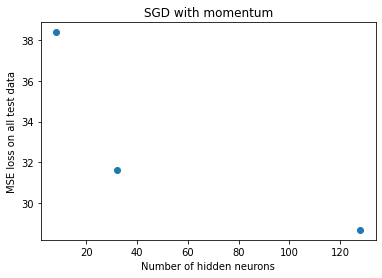

In [ ]:
plt.scatter([8,32,128],[test_loss_sgd_mom_8/len(test_set),test_loss_sgd_mom_32/len(test_set),test_loss_sgd_mom_128/len(test_set)])
plt.title("SGD with momentum")
plt.xlabel("Number of hidden neurons")
plt.ylabel("MSE loss on all test data")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


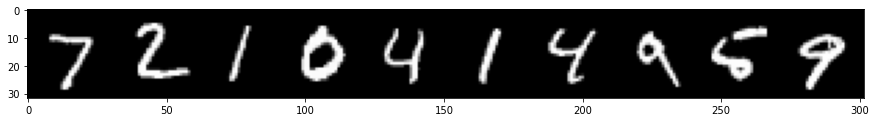

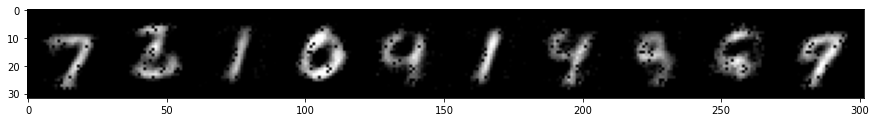

In [ ]:
images,labels = next(iter(test_loader_sgd_mom))
images = images[0:10]
grid = torchvision.utils.make_grid(images.reshape(10,1,28,28), nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)))

images = images.to(device)
outputs = sgd_mom_128(images)
outputs = outputs.to('cpu')

grid_output = torchvision.utils.make_grid(outputs.reshape(10,1,28,28), nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid_output,(1,2,0)))


# 4 SGD without Momentum

In [ ]:
train_loader_sgd = torch.utils.data.DataLoader(train_set,batch_size=10)
test_loader_sgd = torch.utils.data.DataLoader(test_set,batch_size=1)

In [ ]:
# hidden size will be 8 , 32 , 128
sgd_8 = AE(8)
sgd_8.to(device)

optimizer_8 = optim.SGD(sgd_8.parameters(), lr=1)

sgd_8_loss = []
criterion = nn.MSELoss()
for epoch in range(30):
    total_loss = 0.0
    for batch in train_loader_sgd:
        images, labels = batch[0].to(device),batch[1].to(device)
        #print(images.shape)
        preds = sgd_8(images)
        #print(preds.shape)
        loss = criterion(preds,images)
        
        optimizer_8.zero_grad()
        loss.backward()
        optimizer_8.step()
        
        total_loss += loss.item()
    sgd_8_loss.append(total_loss)
    print("epoch: ",epoch,"loss: ",total_loss)
print("Average loss for each image : ", total_loss/len(train_set))

epoch:  0 loss:  268.1662784013897
epoch:  1 loss:  186.17201978899539
epoch:  2 loss:  166.10369482915848
epoch:  3 loss:  154.68308679386973
epoch:  4 loss:  147.6214573662728
epoch:  5 loss:  143.38169212453067
epoch:  6 loss:  140.06778173707426
epoch:  7 loss:  137.2829598635435
epoch:  8 loss:  132.95703397877514
epoch:  9 loss:  131.02091454993933
epoch:  10 loss:  129.32257605157793
epoch:  11 loss:  127.99208067078143
epoch:  12 loss:  126.83474249858409
epoch:  13 loss:  125.6580613637343
epoch:  14 loss:  124.77232187846676
epoch:  15 loss:  123.9145931955427
epoch:  16 loss:  123.239581621252
epoch:  17 loss:  122.61954035330564
epoch:  18 loss:  120.46345658693463
epoch:  19 loss:  119.88234202610329
epoch:  20 loss:  119.31681401468813
epoch:  21 loss:  117.1489140521735
epoch:  22 loss:  116.54024902591482
epoch:  23 loss:  116.0550985308364
epoch:  24 loss:  115.79668885888532
epoch:  25 loss:  115.40888170804828
epoch:  26 loss:  115.08580809365958
epoch:  27 loss:  11

In [ ]:
test_loss_sgd_8 = 0
for data in test_loader_sgd:
    images, labels = data[0].to(device),data[1].to(device)
    outputs = sgd_8(images)
    loss = ((outputs-images)**2).sum()
    #loss = criterion(outputs,images)
    test_loss_sgd_8 += loss.item()*images.shape[0]
print("total reconstruction loss using SGD and 8 neurons : ", test_loss_sgd_8)
print("average loss ", test_loss_sgd_8/len(test_set))

total reconstruction loss using SGD and 8 neurons :  156094.97482693195
average loss  15.609497482693195


In [ ]:
sgd_32 = AE(32)
sgd_32.to(device)

optimizer_32 = optim.SGD(sgd_32.parameters(), lr=1)

sgd_32_loss = []
criterion = nn.MSELoss()
for epoch in range(30):
    total_loss = 0.0
    for batch in train_loader_sgd:
        images, labels = batch[0].to(device),batch[1].to(device)
        #print(images.shape)
        preds = sgd_32(images)
        #print(preds.shape)
        loss = criterion(preds,images)
        
        optimizer_32.zero_grad()
        loss.backward()
        optimizer_32.step()
        
        total_loss += loss.item()
    sgd_32_loss.append(total_loss)
    print("epoch: ",epoch,"loss: ",total_loss)
print("Average loss for each image : ", total_loss/len(train_set))

epoch:  0 loss:  209.70330344885588
epoch:  1 loss:  117.33505623787642
epoch:  2 loss:  105.9504716694355
epoch:  3 loss:  98.19657637085766
epoch:  4 loss:  90.79842579411343
epoch:  5 loss:  85.5306830178015
epoch:  6 loss:  82.4413750837557
epoch:  7 loss:  79.7288607978262
epoch:  8 loss:  75.76951962010935
epoch:  9 loss:  73.49026231840253
epoch:  10 loss:  72.09969548787922
epoch:  11 loss:  70.84403528785333
epoch:  12 loss:  69.94394815526903
epoch:  13 loss:  69.1468305294402
epoch:  14 loss:  68.45718533545732
epoch:  15 loss:  67.80001174705103
epoch:  16 loss:  67.08443069458008
epoch:  17 loss:  66.69340139767155
epoch:  18 loss:  64.27232484146953
epoch:  19 loss:  63.46612144145183
epoch:  20 loss:  62.919852160383016
epoch:  21 loss:  62.40819588745944
epoch:  22 loss:  62.198017480550334
epoch:  23 loss:  61.70901079266332
epoch:  24 loss:  61.56646842812188
epoch:  25 loss:  61.397115593310446
epoch:  26 loss:  60.930241839261726
epoch:  27 loss:  60.68932223203592


In [ ]:
test_loss_sgd_32 = 0
for data in test_loader_sgd:
    images, labels = data[0].to(device),data[1].to(device)
    outputs = sgd_32(images)
    loss = ((outputs-images)**2).sum()
    #loss = criterion(outputs,images)
    test_loss_sgd_32 += loss.item()*images.shape[0]
print("total reconstruction loss using SGD and 32 neurons : ", test_loss_sgd_32)
print("average loss ", test_loss_sgd_32/len(test_set))

total reconstruction loss using SGD and 32 neurons :  79147.48773831129
average loss  7.914748773831129


In [ ]:
sgd_128 = AE(128)
sgd_128.to(device)

optimizer_128 = optim.SGD(sgd_128.parameters(), lr=1)

sgd_128_loss = []
criterion = nn.MSELoss()
for epoch in range(30):
    total_loss = 0.0
    for batch in train_loader_sgd:
        images, labels = batch[0].to(device),batch[1].to(device)
        #print(images.shape)
        preds = sgd_128(images)
        #print(preds.shape)
        loss = criterion(preds,images)
        
        optimizer_128.zero_grad()
        loss.backward()
        optimizer_128.step()
        
        total_loss += loss.item()
    sgd_128_loss.append(total_loss)
    print("epoch: ",epoch,"loss: ",total_loss)
print("Average loss for each image : ", total_loss/len(train_set))

epoch:  0 loss:  221.0764884306118
epoch:  1 loss:  112.26090134866536
epoch:  2 loss:  92.63366095069796
epoch:  3 loss:  80.96131339343265
epoch:  4 loss:  73.4027621424757
epoch:  5 loss:  68.62649787217379
epoch:  6 loss:  65.99487343430519
epoch:  7 loss:  63.974699115380645
epoch:  8 loss:  62.20261520566419
epoch:  9 loss:  60.38341276906431
epoch:  10 loss:  59.1931411055848
epoch:  11 loss:  58.05167404725216
epoch:  12 loss:  57.13216901384294
epoch:  13 loss:  56.39307567384094
epoch:  14 loss:  55.725320416502655
epoch:  15 loss:  55.1458750590682
epoch:  16 loss:  54.54113844782114
epoch:  17 loss:  54.128758929204196
epoch:  18 loss:  53.62656418886036
epoch:  19 loss:  53.29577594459988
epoch:  20 loss:  52.89992044866085
epoch:  21 loss:  52.55669915350154
epoch:  22 loss:  52.26433048886247
epoch:  23 loss:  52.00425956049003
epoch:  24 loss:  51.76240149606019
epoch:  25 loss:  51.53480523615144
epoch:  26 loss:  51.28443654696457
epoch:  27 loss:  51.08393807918765
e

In [ ]:
test_loss_sgd_128 = 0
for data in test_loader_sgd:
    images, labels = data[0].to(device),data[1].to(device)
    outputs = sgd_128(images)
    loss = ((outputs-images)**2).sum()
    #loss = criterion(outputs,images)
    test_loss_sgd_128 += loss.item()*images.shape[0]
print("total reconstruction loss using SGD and 128 neurons : ", test_loss_sgd_128)
print("average loss ", test_loss_sgd_128/len(test_set))

total reconstruction loss using SGD and 128 neurons :  66904.97422200441
average loss  6.690497422200441


Text(0, 0.5, 'MSE loss on all test data')

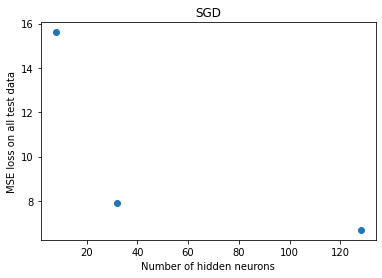

In [ ]:
plt.scatter([8,32,128],[test_loss_sgd_8/len(test_set),test_loss_sgd_32/len(test_set),test_loss_sgd_128/len(test_set)])
plt.title("SGD")
plt.xlabel("Number of hidden neurons")
plt.ylabel("MSE loss on all test data")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


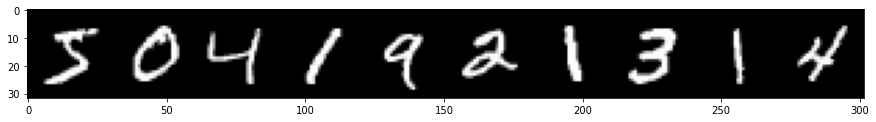

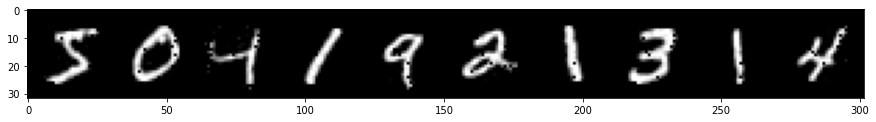

In [ ]:
images,labels = next(iter(train_loader_sgd))
images = images[0:10]
grid = torchvision.utils.make_grid(images.reshape(10,1,28,28), nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)))

images = images.to(device)
outputs = sgd_128(images)
outputs = outputs.to('cpu')

grid_output = torchvision.utils.make_grid(outputs.reshape(10,1,28,28), nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid_output,(1,2,0)))

# PCA reconstruction

In [28]:
from keras.datasets import mnist
from sklearn.decomposition import PCA

In [46]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [47]:
train_X = train_X.astype('float32')
train_X/=255
test_X = test_X.astype('float32')
test_X/=255

In [71]:
pca_8 = PCA(n_components=8)
X_test_pca_8 = pca_8.fit_transform(test_X_reshaped)
proj_8 = pca_8.inverse_transform(X_test_pca_8)
pca_loss_8 = ((test_X_reshaped - proj_8) ** 2)
pca_loss_8 = np.sum(pca_loss_8,axis=1).mean()
print("pca loss with 8 : ",pca_loss_8)

pca loss with 8 :  29.226255


In [66]:
pca_32 = PCA(n_components=32)
X_test_pca_32 = pca_32.fit_transform(test_X_reshaped)
proj_32 = pca_32.inverse_transform(X_test_pca_32)
pca_loss_32 = ((test_X_reshaped - proj_32) ** 2)
pca_loss_32 = np.sum(pca_loss_32,axis=1).mean()
print("pca loss with 32 : ",pca_loss_32)

pca loss with 32 :  13.073651


In [67]:
pca_128 = PCA(n_components=128)
X_test_pca_128 = pca_128.fit_transform(test_X_reshaped)
proj_128 = pca_128.inverse_transform(X_test_pca_128)
pca_loss_128 = ((test_X_reshaped - proj_128) ** 2)
pca_loss_128 = np.sum(pca_loss_128,axis=1).mean()
print("pca loss with 128 : ",pca_loss_128)

pca loss with 128 :  3.232734


In [ ]:
from prettytable import PrettyTable
t = PrettyTable(['Sum of MSE of 10,000 test','Adam ', 'RMSProp ','SGD Momentum','SGD','PCA'])
t.add_row(['8',test_loss_adam_8/len(test_set),test_loss_rms_8/len(test_set),test_loss_sgd_mom_8/len(test_set),test_loss_sgd_8/len(test_set),pca_loss_8 ])
t.add_row(['32', test_loss_adam_32/len(test_set),test_loss_rms_32/len(test_set),test_loss_sgd_mom_32/len(test_set),test_loss_sgd_32/len(test_set),pca_loss_32])
t.add_row(['128', test_loss_adam_128/len(test_set),test_loss_rms_128/len(test_set),test_loss_sgd_mom_128/len(test_set),test_loss_sgd_128/len(test_set),pca_loss_128])
print(t)

+---------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| Sum of MSE of 10,000 test |       Adam         |      RMSProp       |    SGD Momentum    |        SGD         |        PCA         |
+---------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|             8             | 22.144848379075526 | 21.86954240834713  | 38.38530274963379  | 15.609497482693195 | 2424.0272316051687 |
|             32            | 14.11356001933813  | 10.847315914863348 | 31.596057715177537 | 7.914748773831129  | 1084.3046719460535 |
|            128            | 12.67792068155408  | 8.643251908928155  | 28.677601291894913 | 6.690497422200441  | 267.84070961454535 |
+---------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+


# Ignore PCA colum above

In [68]:
print( "pca with 8 dimension : ",pca_loss_8)
print( "pca with 32 dimension : ",pca_loss_32)
print( "pca with 128 dimension : ",pca_loss_128)

pca with 8 dimension :  29.226255
pca with 32 dimension :  13.073651
pca with 128 dimension :  3.232734
